<a href="https://colab.research.google.com/github/Anirudh-Aravind/Traffic-Sign-Identification-by-using-CNN/blob/main/TR_Sign_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import  BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
import imutils
import pathlib

from matplotlib import style
style.use('fivethirtyeight')

In [ ]:
from imutils import paths
from tensorflow import keras
from glob import glob
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.losses import SparseCategoricalCrossentropy,CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

### Assigning Path for Dataset

In [ ]:
image_path=pathlib.Path('/content/drive/MyDrive/Data Science/CNN/Traffic_Sign')

## Read each file from image path directory
####-> .glob is used to collect all images from the file 
-> eg: "'DANGEROUS DIP/*jpg" , here 'DANGEROUS DIP' is the file name in the directory and ' *jpg ' is used to collect all jpg format images from the file

In [ ]:
dip_list=list(image_path.glob('DANGEROUS DIP/*jpg'))
HornPr_list=list(image_path.glob('HORN PROHIBITED/*jpg'))
hump_list=list(image_path.glob('HUMP OR ROUGH/*jpg'))
LHPB_list=list(image_path.glob('LEFT HAIR PIN BEND/*jpg'))
RHPB_list=list(image_path.glob('RIGHT HAIR PIN BEND/*jpg'))
LHC_list=list(image_path.glob('LEFT HAND CURVE/*jpg'))
RHC_list=list(image_path.glob('RIGHT HAND CURVE/*jpg'))
LRB_list=list(image_path.glob('LEFT REVERSE BEND/*jpg'))
RRB_list=list(image_path.glob('RIGHT REVERSE BEND/*jpg'))
LoosGr_list=list(image_path.glob('LOOSE GRAVEL/*jpg'))
Nrw_Brd_list=list(image_path.glob('NARROW BRIDGE/*jpg'))
No_Park_list=list(image_path.glob('NO PARKING/*jpg'))
NO_Stp_Stnd_list=list(image_path.glob('NO STOPPING OR STANDING/*jpg'))
Pedes_Cross_list=list(image_path.glob('PEDESTRAIN CROSSING/*jpg'))
Sch_Ahead_list=list(image_path.glob('SCHOOL AHEAD/*jpg'))
Slip_Road_list=list(image_path.glob('SLIPPERY ROAD/*jpg'))
Spd_Lm50_list=list(image_path.glob('SPEED LIMIT 50/*jpg'))
Steep_Ascent_list=list(image_path.glob('STEEP ASCENT/*jpg'))
Steep_Descent_list=list(image_path.glob('STEEP DESCENT/*jpg'))
Stop_list=list(image_path.glob('STOP/*jpg'))
No_entry_list=list(image_path.glob('STRAIGHT PROHIBITOR NO ENTRY/*jpg'))

### Store the image folders and their corresponding classes in dictionary format

In [ ]:
sign_List={
    'Dangerous DIP':dip_list,
    'Horn Prohibited':HornPr_list,
    'Hump':hump_list,
    'Left Hair Pin Bend':LHPB_list,
    'Right Hair Pin Bend':RHPB_list,
    'Left_Hand Curve':LHC_list,
    'Right Hand Curve':RHC_list,
    'Left Reverse Bend':LRB_list,
    'Right Reverse Bend':RRB_list,
    'Loose Gravel':LoosGr_list,
    'Narrow Bridge':Nrw_Brd_list,
    'No Parking':No_Park_list,
    'No Stopping or Standing':NO_Stp_Stnd_list,
    'Pedestrain Crossing':Pedes_Cross_list,
    'School Ahead':Sch_Ahead_list,
    'Slippery Road':Slip_Road_list,
    'Speed Limit 50':Spd_Lm50_list,
    'Steep Ascent':Steep_Ascent_list,
    'Steep Descent':Steep_Descent_list,
    'Stop':Stop_list,
    'STRAIGHT PROHIBITOR NO ENTRY':No_entry_list
}



sign_Class={
       'Dangerous DIP':0,
    'Horn Prohibited':1,
    'Hump':2,
    'Left Hair Pin Bend':3,
    'Right Hair Pin Bend':4,
    'Left_Hand Curve':5,
    'Right Hand Curve':6,
    'Left Reverse Bend':7,
    'Right Reverse Bend':8,
    'Loose Gravel':9,
    'Narrow Bridge':10,
    'No Parking':11,
    'No Stopping or Standing':12,
    'Pedestrain Crossing':13,
    'School Ahead':14,
    'Slippery Road':15,
    'Speed Limit 50':16,
    'Steep Ascent':17,
    'Steep Descent':18,
    'Stop':19,
    'STRAIGHT PROHIBITOR NO ENTRY':20
}

## Visualizing the data set

In [ ]:
image_data_dir="/content/drive/MyDrive/Data Science/CNN/Traffic_Sign"

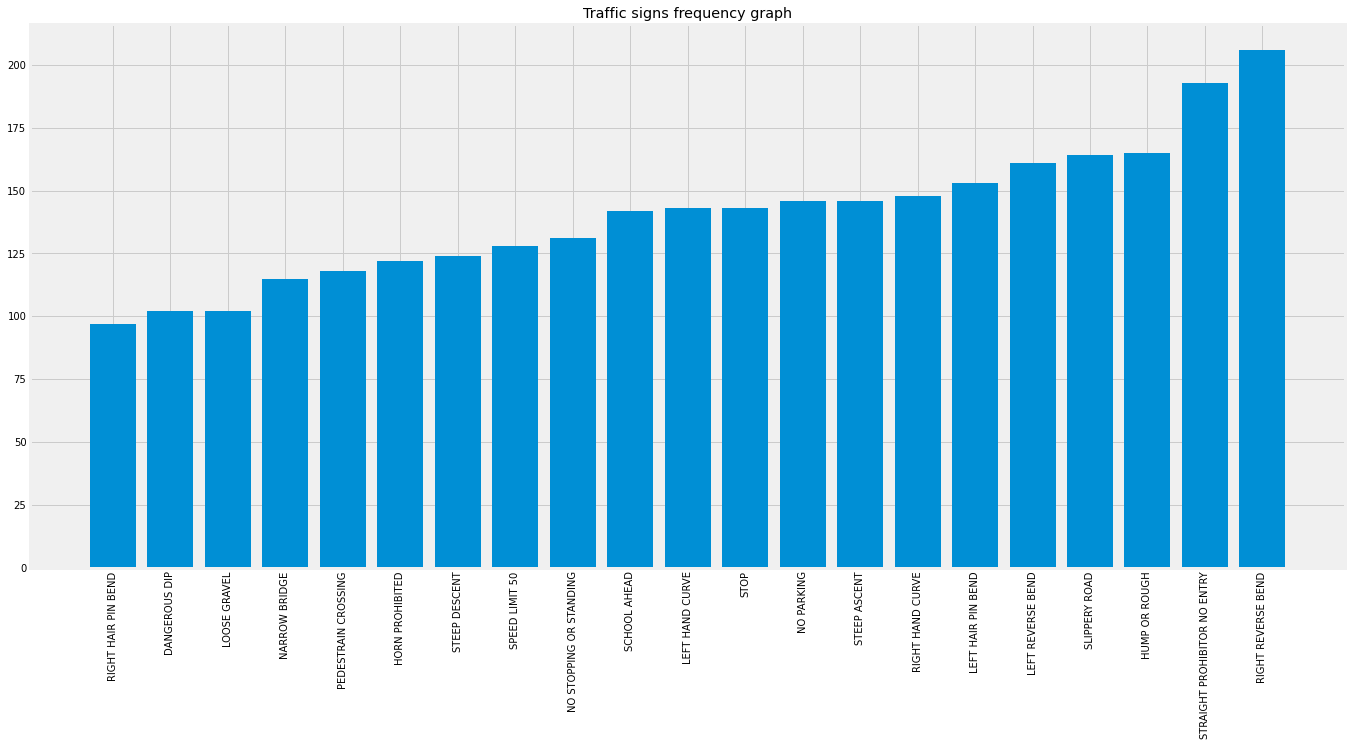

In [ ]:
folders = os.listdir(image_data_dir)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(image_data_dir + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(folder)
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tup) for tup in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation=90)
plt.title("Traffic signs frequency graph")
plt.show()

## Collecting and Preprocessing the Training Data

In [ ]:
X=[]
y=[]

for i in sign_List:
    sign_name=i
    sign_path_list=sign_List[sign_name]
    for path in sign_path_list:
        img=cv2.imread(str(path))
        img=cv2.resize(img,(64,64))
        img=img/255
        X.append(img)
        cls=sign_Class[sign_name]
        y.append(cls)

In [ ]:
image_data=np.array(X)
image_labels=np.array(y)

## Shuffling the training data

In [ ]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

## Spliting the data set into training and testing

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (2000, 64, 64, 3)
X_valid.shape (858, 64, 64, 3)
y_train.shape (2000,)
y_valid.shape (858,)


In [ ]:
y_tr=y_train
y_te=y_val

### Converting dependant variable ("y") into vector format

In [ ]:
NUM_CATEGORIES = len(os.listdir(image_data_dir))
NUM_CATEGORIES

21

In [ ]:
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(2000, 21)
(858, 21)


### Model creation

In [ ]:
hidden_num_units = 2048
hidden_num_units1 = 1024
hidden_num_units2 = 128
pool_size = (2, 2)



model = Sequential([
Conv2D(16, (3, 3), activation='relu', input_shape=(64,64,3), padding='same'),
 BatchNormalization(),
Conv2D(16, (3, 3), activation='relu', padding='same'),
 BatchNormalization(),
 MaxPooling2D(pool_size=pool_size),
 Dropout(0.2),
    
 Conv2D(32, (3, 3), activation='relu', padding='same'),
 BatchNormalization(),
    
 Conv2D(32, (3, 3), activation='relu', padding='same'),
 BatchNormalization(),
 MaxPooling2D(pool_size=pool_size),
 Dropout(0.2),
    
 Conv2D(64, (3, 3), activation='relu', padding='same'),
 BatchNormalization(),
    
 Conv2D(64, (3, 3), activation='relu', padding='same'),
 BatchNormalization(),
 MaxPooling2D(pool_size=pool_size),
 Dropout(0.2),
Flatten(),
Dense(units=hidden_num_units, activation='relu'),
 Dropout(0.3),
 Dense(units=hidden_num_units1, activation='relu'),
 Dropout(0.3),
 Dense(units=hidden_num_units2, activation='relu'),
 Dropout(0.3),
 Dense(units=21, input_dim=hidden_num_units, activation='softmax'),
])

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4), metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 16)        2320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        4

### Train the model by using augmented images (slightly modified copies of already existing images)

In [ ]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

In [ ]:
history = model.fit(aug.flow(X_train, y_train, batch_size=5), epochs=120, validation_data=(X_val, y_val))

Epoch 1/120
400/400 [==============================] - 36s 13ms/step - loss: 3.2927 - accuracy: 0.0790 - val_loss: 3.0210 - val_accuracy: 0.0909
Epoch 2/120
400/400 [==============================] - 5s 12ms/step - loss: 3.0508 - accuracy: 0.0890 - val_loss: 2.8546 - val_accuracy: 0.1667
Epoch 3/120
400/400 [==============================] - 5s 11ms/step - loss: 2.9336 - accuracy: 0.1235 - val_loss: 2.7167 - val_accuracy: 0.1550
Epoch 4/120
400/400 [==============================] - 5s 11ms/step - loss: 2.8124 - accuracy: 0.1500 - val_loss: 2.5386 - val_accuracy: 0.2517
Epoch 5/120
400/400 [==============================] - 5s 11ms/step - loss: 2.6420 - accuracy: 0.1975 - val_loss: 2.3795 - val_accuracy: 0.2611
Epoch 6/120
400/400 [==============================] - 5s 11ms/step - loss: 2.5268 - accuracy: 0.2430 - val_loss: 2.2223 - val_accuracy: 0.3159
Epoch 7/120
400/400 [==============================] - 5s 11ms/step - loss: 2.4091 - accuracy: 0.2625 - val_loss: 1.9869 - val_accuracy

## Evaluating the model

In [ ]:
model.evaluate(X_val,y_val)

27/27 [==============================] - 0s 6ms/step - loss: 0.2404 - accuracy: 0.9580


[0.24039685726165771, 0.9580419659614563]

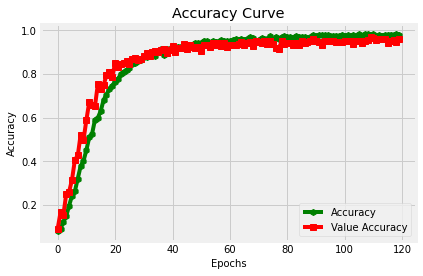

In [ ]:
# Accuracy Curve
plt.plot(history.history['accuracy'],'hg-',lw=4,label="Accuracy")
plt.plot(history.history['val_accuracy'],'sr-',lw=4,label='Value Accuracy')
plt.xlabel("Epochs",fontsize=10)
plt.ylabel("Accuracy",fontsize=10)
plt.legend()
plt.title("Accuracy Curve")
plt.show()

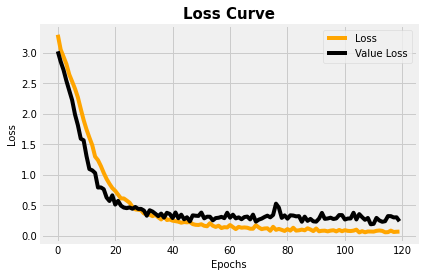

In [ ]:
# Loss Curve
plt.plot(history.history['loss'],color='orange',lw=4,label="Loss")
plt.plot(history.history['val_loss'],color='black',lw=4,label='Value Loss')
plt.xlabel("Epochs",fontsize=10)
plt.ylabel("Loss",fontsize=10)
plt.legend()
plt.title("Loss Curve",fontsize=15,weight='bold')
plt.show()

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,3.292748,0.0790,3.021048,0.090909
1,3.050823,0.0890,2.854620,0.166667
2,2.933572,0.1235,2.716702,0.155012
3,2.812395,0.1500,2.538598,0.251748
4,2.642021,0.1975,2.379518,0.261072
...,...,...,...,...
115,0.061948,0.9790,0.324632,0.941725
116,0.086715,0.9805,0.323561,0.949883
117,0.064592,0.9780,0.302737,0.955711
118,0.068798,0.9840,0.305022,0.946387


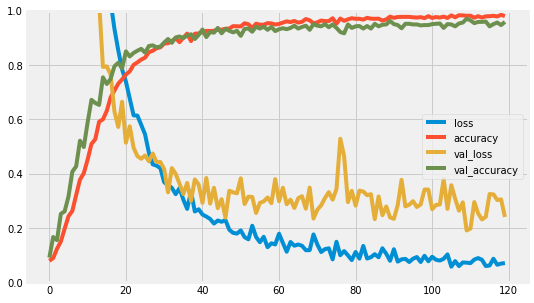

In [ ]:
# Accuracy & Loss Combined
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
y_pred = model.predict_classes(X_val)
y_pred[:30]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([10, 19, 15, 11,  8, 15, 11,  1, 13, 20, 15, 14, 20, 13,  3,  2, 12,
       15,  7, 11,  3,  1, 10, 12,  6,  8, 11, 10, 12,  2])

In [ ]:
y_te[:30]

array([10, 19, 15, 11,  8, 15, 11,  1, 13, 20, 15, 14, 20, 13,  3,  2, 12,
       15,  7, 11,  3,  1, 10, 12,  6,  8, 11, 10, 12,  2])

### Visualizing the confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_te, y_pred)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbbd41b4c90>)

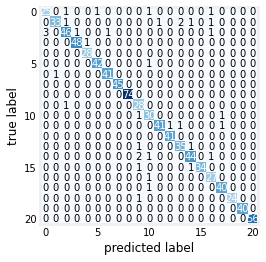

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(cf)

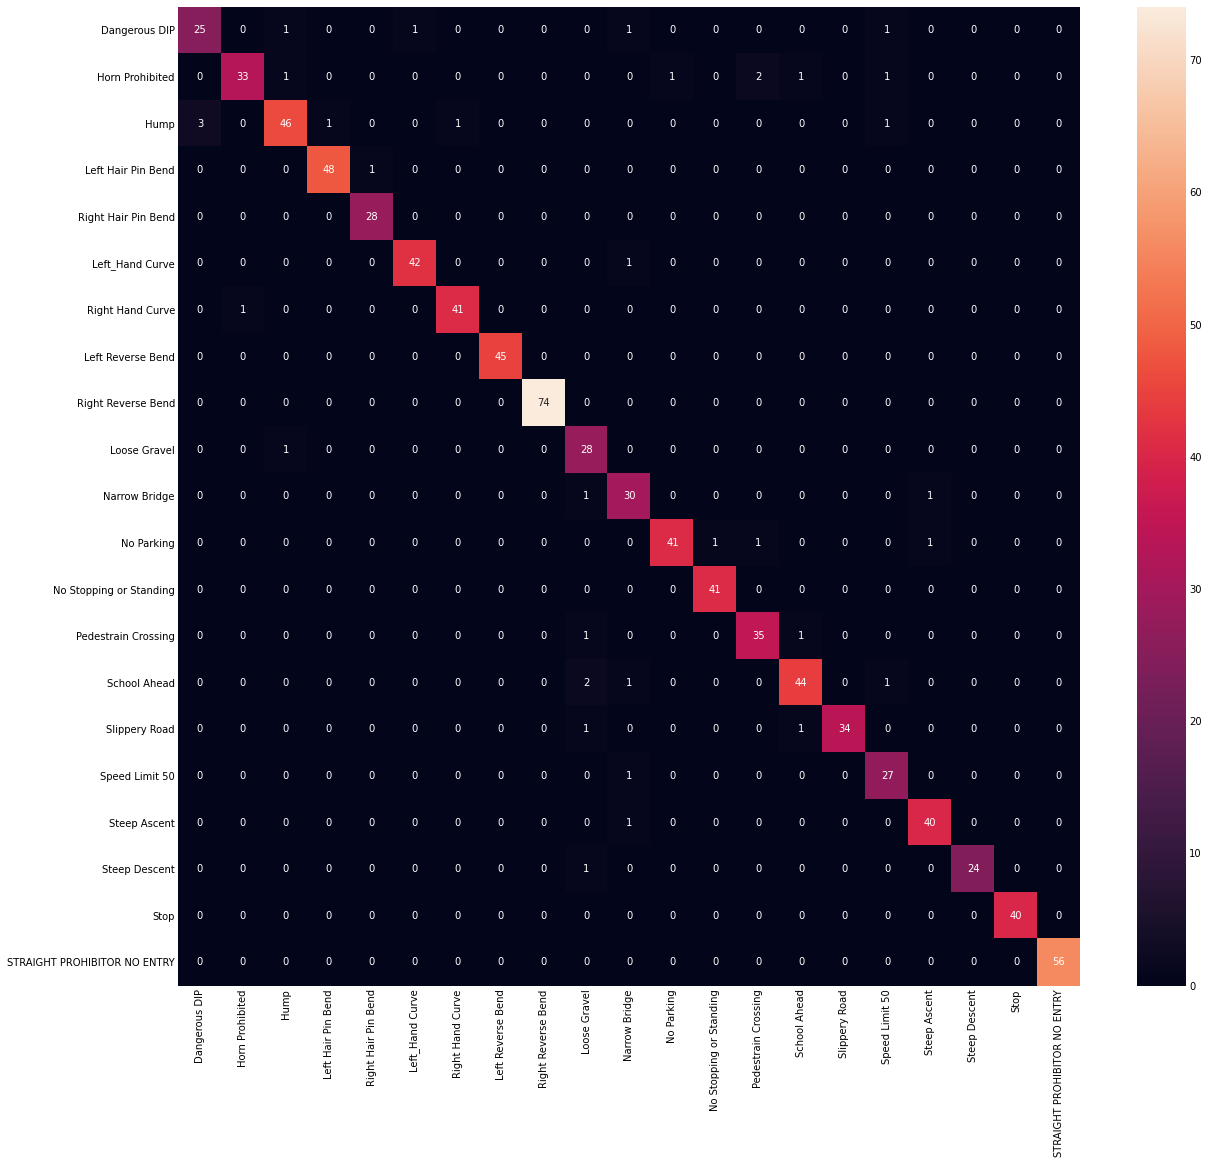

In [ ]:
import seaborn as sns
df_cm = pd.DataFrame(cf, index = sign_Class,  columns = sign_Class)
plt.figure(figsize = (18,18))
sns.heatmap(df_cm, annot=True)

## Classification report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_te, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.97      0.85      0.90        39
           2       0.94      0.88      0.91        52
           3       0.98      0.98      0.98        49
           4       0.97      1.00      0.98        28
           5       0.98      0.98      0.98        43
           6       0.98      0.98      0.98        42
           7       1.00      1.00      1.00        45
           8       1.00      1.00      1.00        74
           9       0.82      0.97      0.89        29
          10       0.86      0.94      0.90        32
          11       0.98      0.93      0.95        44
          12       0.98      1.00      0.99        41
          13       0.92      0.95      0.93        37
          14       0.94      0.92      0.93        48
          15       1.00      0.94      0.97        36
          16       0.87      0.96      0.92        28
          17       0.95    

## Predictions on Test Data

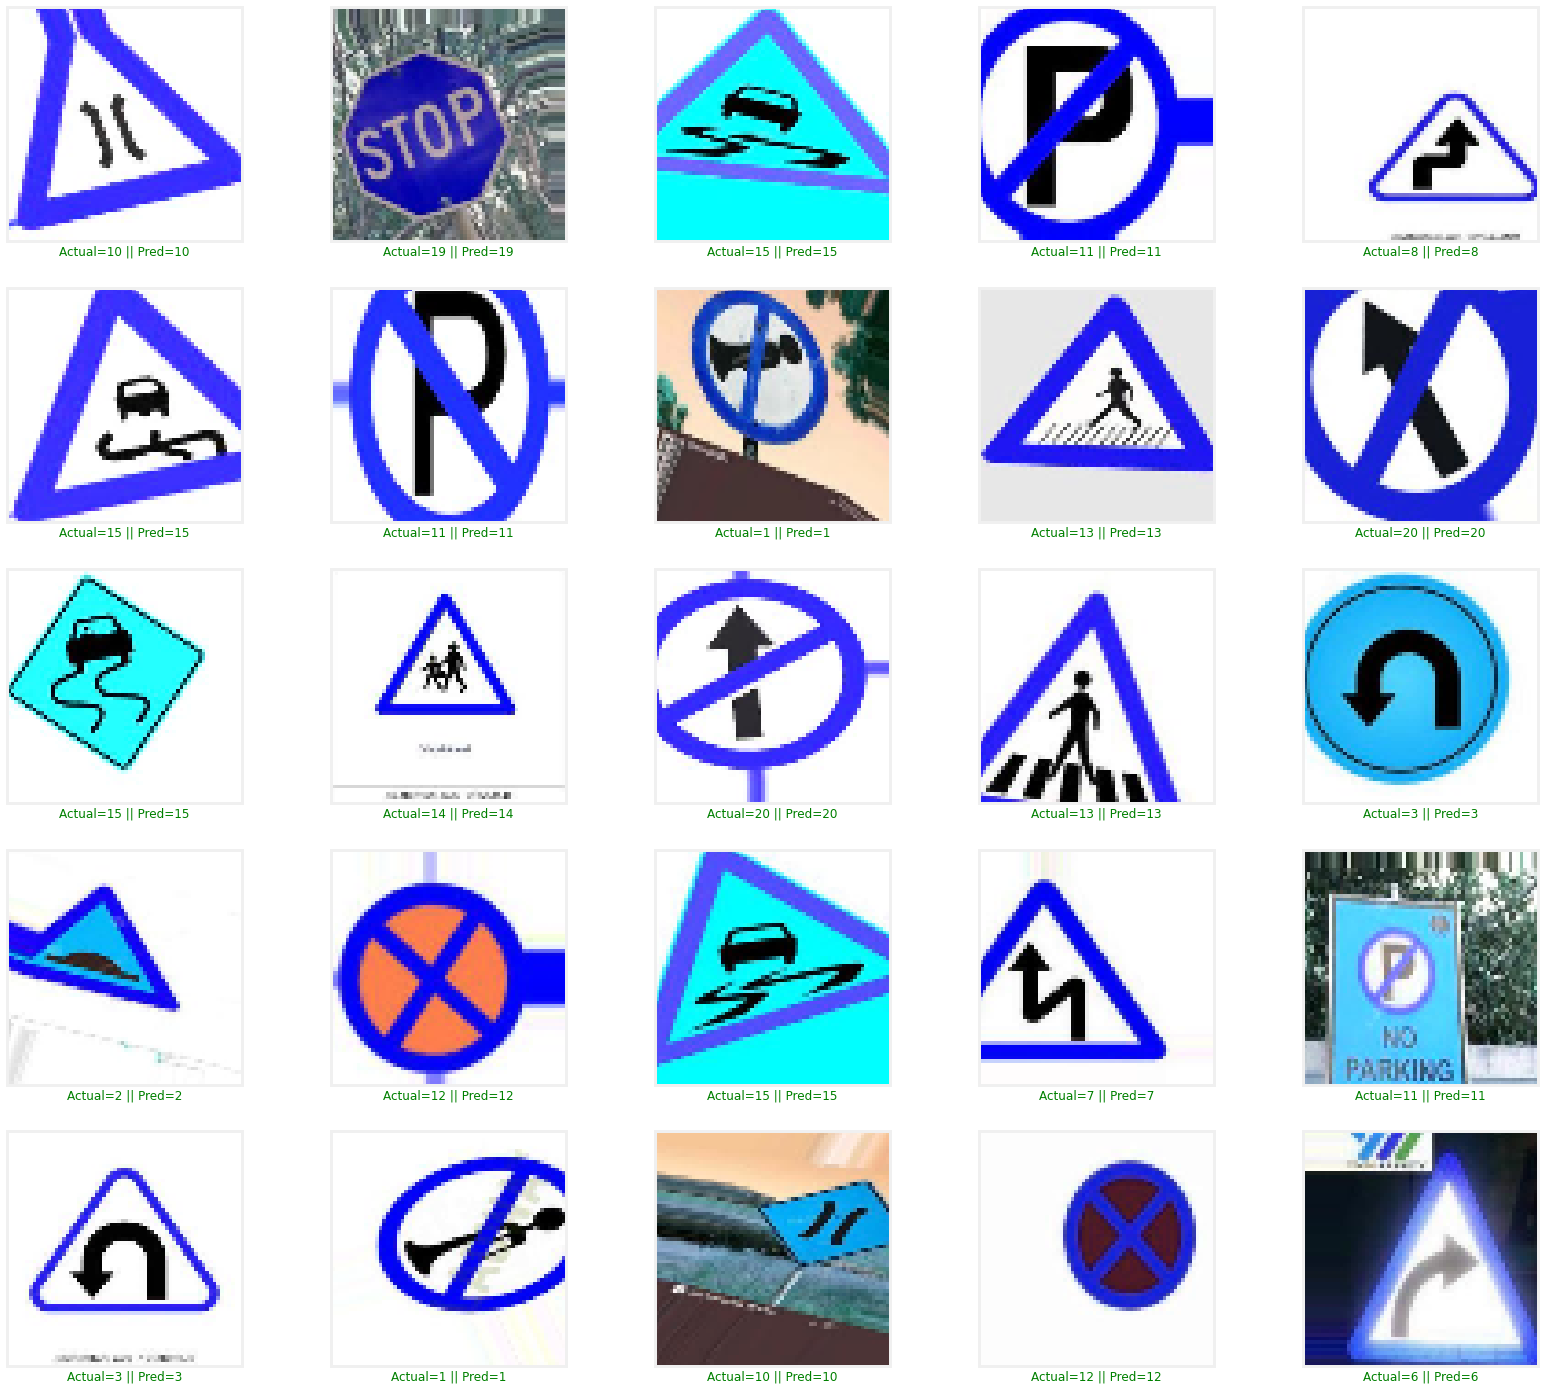

In [ ]:
plt.figure(figsize = (25, 25))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = y_pred[i]
    actual = y_te[i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_val[i])
plt.show()

## Save the model in .h5 format

In [ ]:
model.save("Sign_Identification_MODEL.h5")